# Punto N°1 Procesos Estocásticos

Para $t_1 < t_2 < t_3$ obtenga las propiedades distribucionales de $W_t = B_{t1}B_{t2}B_{t3}$, con $B_t$ como un Movimiento Browniano Estándar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def browniano_estandar(trayectorias, delta):
    browniano = []
    browniano.append(np.zeros(trayectorias))
    for i in range(int(1/delta)):
        B_t = browniano[-1] + np.sqrt(delta) * np.random.normal(0, 1, trayectorias)
        browniano.append(B_t)
    return browniano

def seleccionar_tiempos(t, delta):
    t1 = int(t/delta * 0.3)
    t2 = int(t/delta * 0.6)
    t3 = int(t/delta)
    return t1, t2, t3

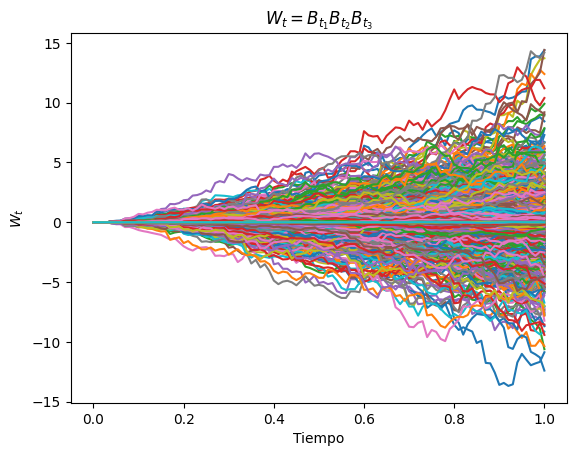

In [3]:
# Parámetros del proceso estocástico
trayectorias = 10000
delta = 0.01

tiempos = np.arange(0, 1+delta, delta)
browniano = browniano_estandar(trayectorias, delta)

W_t = []
for t in tiempos:
    t1, t2, t3 = seleccionar_tiempos(t, delta)
    W_t_inst = browniano[t1] * browniano[t2] * browniano[t3]
    W_t.append(W_t_inst)

plt.plot(tiempos, W_t)
plt.title('$W_t = B_{t_1}B_{t_2}B_{t_3}$')
plt.xlabel('Tiempo')
plt.ylabel('$W_t$')
plt.show()


Esperanza

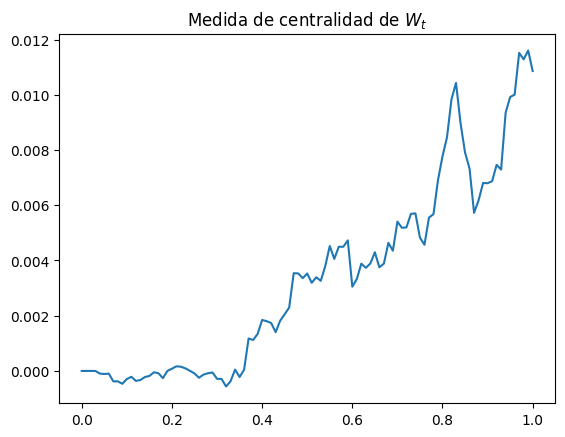

In [4]:
m=[]
for i in W_t:
    m.append(np.mean(i))

tiempos=np.arange(0, 1+delta, delta).tolist()
fig, ax = plt.subplots()
ax.plot(tiempos,m,label='Media simulada')
ax.set_title("Medida de centralidad de $W_t$")
plt.show()

Varianza

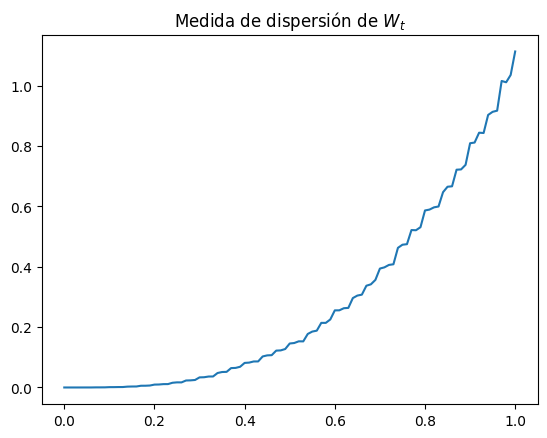

In [5]:
var=[]
for i in W_t:
    var.append(np.var(i))

# Tiempos para la gráfica de la varianza en el punto t
tiempos=np.arange(0, 1+delta, delta).tolist()

fig, ax = plt.subplots()
ax.plot(tiempos,var, label='Varianza simulada')
ax.set_title("Medida de dispersión de $W_t$")
plt.show()

Covarianza

Text(0.5, 0.5, 't')

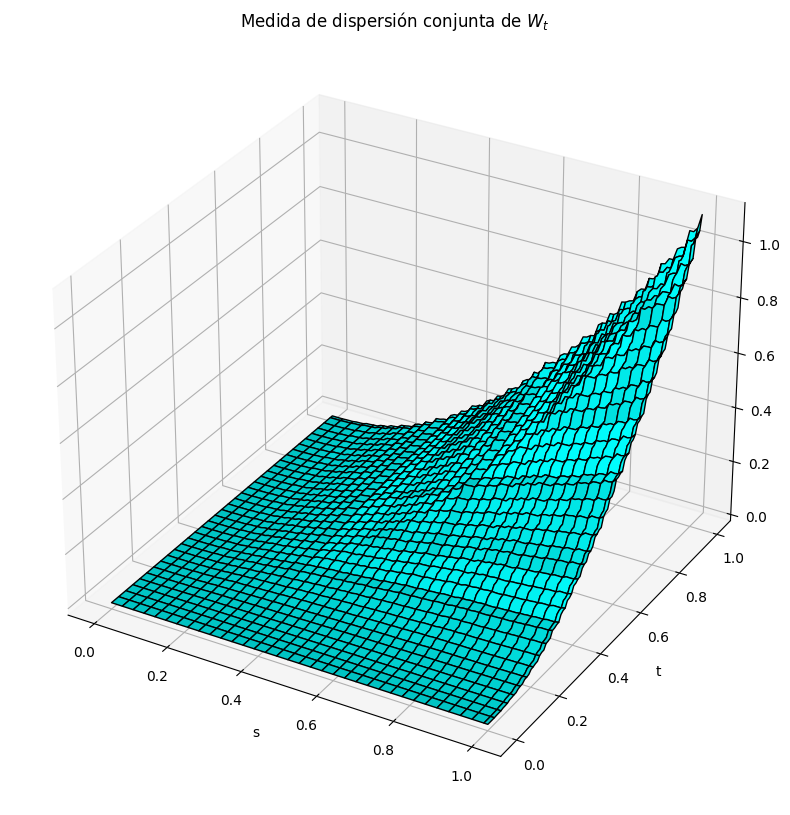

In [7]:
paths=np.array(W_t).transpose()

# Calculamos la matriz de covarianza
cov_matrix=np.cov(paths, rowvar=False)

# Índices de tiempo
s_values=np.arange(0, 1+delta, delta)
s,t=np.meshgrid(s_values, s_values)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(s,t,cov_matrix,color='cyan', edgecolor='k')
ax.set_title('Medida de dispersión conjunta de $W_t$')
ax.set_xlabel('s')
ax.set_ylabel('t')

Test para hallar la distribución

In [50]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# Aquí selecciono un instante de tiempo arbitrario (puedes iterar para diferentes tiempos)
p_value1=[]
p_value2=[]
p_value3=[]
stadistic1=[]
stadistic2=[]
stadistic3=[]

for i in range(0,len(W_t)):
    # Test de Shapiro-Wilk para normalidad
    shapiro_test_stat, shapiro_p_value = stats.shapiro(W_t[i])
    p_value1.append(shapiro_p_value)
    stadistic1.append(shapiro_test_stat)
    #print(f"Shapiro-Wilk: Estadístico={shapiro_test_stat}, p-valor={shapiro_p_value}")

    # Test de Jarque-Bera para normalidad
    jarque_test_stat, jarque_p_value = stats.jarque_bera(W_t[i])
    p_value2.append(jarque_p_value)
    stadistic2.append(jarque_test_stat)
    #print(f"Jarque-Bera: Estadístico={jarque_test_stat}, p-valor={jarque_p_value}")

    # Test de Kolmogorov-Smirnov (después de ajustar una distribución normal)
    mu, std = stats.expon.fit(W_t[i])
    ks_test_stat, ks_p_value = stats.kstest(W_t_inst, 'norm', args=(mu, std))
    p_value3.append(ks_p_value)
    stadistic3.append(ks_test_stat)
    #print(f"Kolmogorov-Smirnov: Estadístico={ks_test_stat}, p-valor={ks_p_value}")


/Applications/anaconda3/envs/EAFIT/lib/python3.10/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/Applications/anaconda3/envs/EAFIT/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Applications/anaconda3/envs/EAFIT/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2066: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


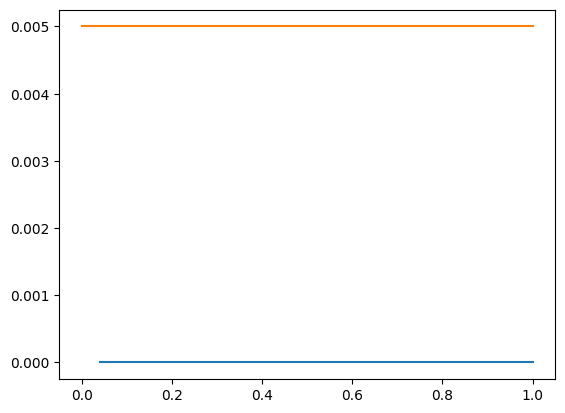

In [51]:
plt.plot(np.arange(0, 1+delta, delta),p_value3)
plt.plot(np.arange(0, 1+delta, delta),np.zeros(101)+0.005)